<a href="https://colab.research.google.com/github/Ranger3560/studious-train-salary/blob/main/Salaries_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install pandas if not already installed (usually pre-installed in Colab)
!pip install pandas

import pandas as pd

# Define the path to the CSV file
csv_file_path = '/content/Salary_Dataset_DataScienceLovers.csv'

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded '{csv_file_path}' into a DataFrame.")
    print("First 5 rows of the DataFrame:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure the file is uploaded to the correct path.")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")

Successfully loaded '/content/Salary_Dataset_DataScienceLovers.csv' into a DataFrame.
First 5 rows of the DataFrame:
   Rating                      Company Name          Job Title   Salary  \
0     3.8                            Sasken  Android Developer   400000   
1     4.5  Advanced Millennium Technologies  Android Developer   400000   
2     4.0                         Unacademy  Android Developer  1000000   
3     3.8                SnapBizz Cloudtech  Android Developer   300000   
4     4.4            Appoids Tech Solutions  Android Developer   600000   

   Salaries Reported   Location Employment Status Job Roles  
0                  3  Bangalore         Full Time   Android  
1                  3  Bangalore         Full Time   Android  
2                  3  Bangalore         Full Time   Android  
3                  3  Bangalore         Full Time   Android  
4                  3  Bangalore         Full Time   Android  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Range

In [5]:
print("\nDescriptive Statistics (including count and mean/average):\n")
print(df.describe())

print("\nSum of numerical columns:\n")
# Select only numerical columns for sum calculation
numerical_cols = df.select_dtypes(include=['number']).columns
print(df[numerical_cols].sum())


Descriptive Statistics (including count and mean/average):

             Rating        Salary  Salaries Reported
count  22770.000000  2.277000e+04       22770.000000
mean       3.918213  6.953872e+05           1.855775
std        0.519675  8.843990e+05           6.823668
min        1.000000  2.112000e+03           1.000000
25%        3.700000  3.000000e+05           1.000000
50%        3.900000  5.000000e+05           1.000000
75%        4.200000  9.000000e+05           1.000000
max        5.000000  9.000000e+07         361.000000

Sum of numerical columns:

Rating               8.921770e+04
Salary               1.583397e+10
Salaries Reported    4.225600e+04
dtype: float64


In [7]:
# Identify outliers using the Interquartile Range (IQR) method

print("\n--- Outlier Detection using IQR Method ---\n")

numerical_cols = ['Rating', 'Salary', 'Salaries Reported'] # Columns identified as numerical earlier

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Outliers for column '{col}':")
    print(f"  Q1 (25th percentile): {Q1:.2f}")
    print(f"  Q3 (75th percentile): {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    if not outliers.empty:
        print("  First 5 outlier values (if any):")
        print(outliers[col].head())
    print("\n")


--- Outlier Detection using IQR Method ---

Outliers for column 'Rating':
  Q1 (25th percentile): 3.70
  Q3 (75th percentile): 4.20
  IQR: 0.50
  Lower Bound: 2.95
  Upper Bound: 4.95
  Number of outliers: 1548
  First 5 outlier values (if any):
30    5.0
35    5.0
37    2.9
42    1.0
43    2.9
Name: Rating, dtype: float64


Outliers for column 'Salary':
  Q1 (25th percentile): 300000.00
  Q3 (75th percentile): 900000.00
  IQR: 600000.00
  Lower Bound: -600000.00
  Upper Bound: 1800000.00
  Number of outliers: 1156
  First 5 outlier values (if any):
96     2800000
106    2300000
145    2200000
161    2100000
162    1900000
Name: Salary, dtype: int64


Outliers for column 'Salaries Reported':
  Q1 (25th percentile): 1.00
  Q3 (75th percentile): 1.00
  IQR: 0.00
  Lower Bound: 1.00
  Upper Bound: 1.00
  Number of outliers: 4564
  First 5 outlier values (if any):
0    3
1    3
2    3
3    3
4    3
Name: Salaries Reported, dtype: int64




--- Classification and Visualizations ---

Top 15 Job Titles and their counts:
Job Title
Software Development Engineer                   2351
Android Developer                               2029
Software Development Engineer (SDE)             1614
Front End Developer                             1412
Test Engineer                                   1314
Web Developer                                    853
Software Development Engineer - Intern           771
Software Development Engineer In Test (SDET)     766
Backend Developer                                534
Python Developer                                 485
IOS Developer                                    484
Java Developer                                   387
Senior IOS Developer                             351
Senior Software Development Engineer             350
Junior Java Developer                            330
Name: count, dtype: int64


/tmp/ipython-input-2108992734.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=job_title_counts.head(15).index, x=job_title_counts.head(15).values, palette='viridis')


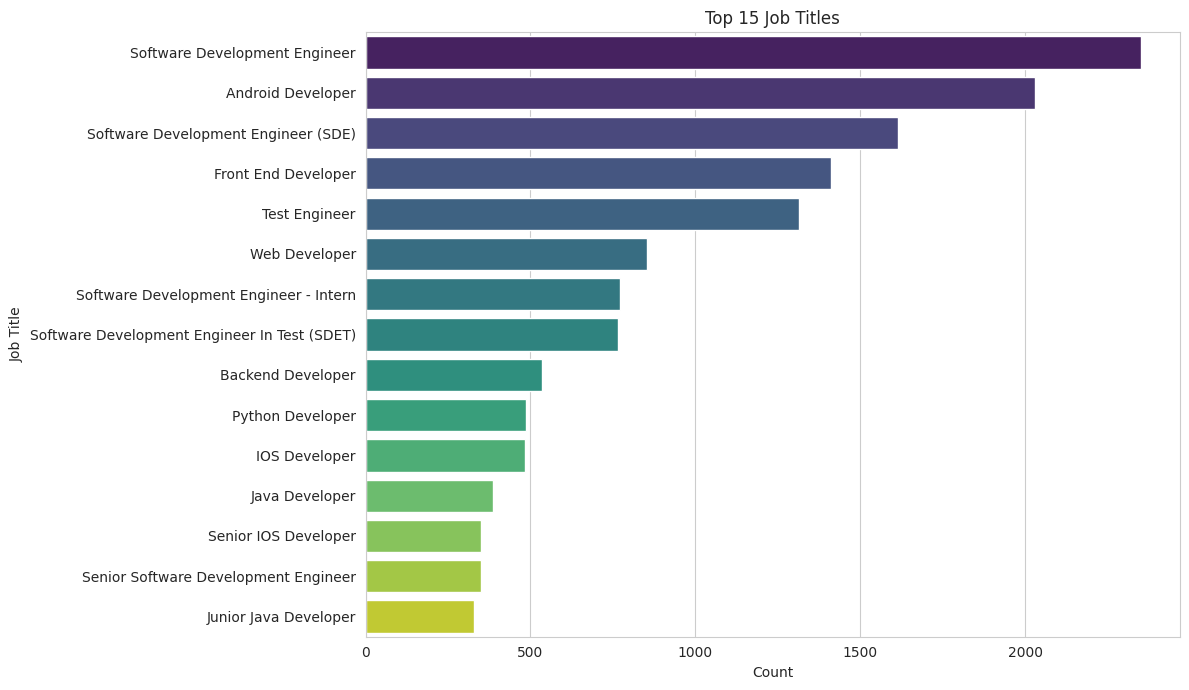


Employment Status counts:
Employment Status
Full Time     20083
Intern         2106
Contractor      548
Trainee          33
Name: count, dtype: int64


/tmp/ipython-input-2108992734.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_status_counts.index, y=employment_status_counts.values, palette='magma')


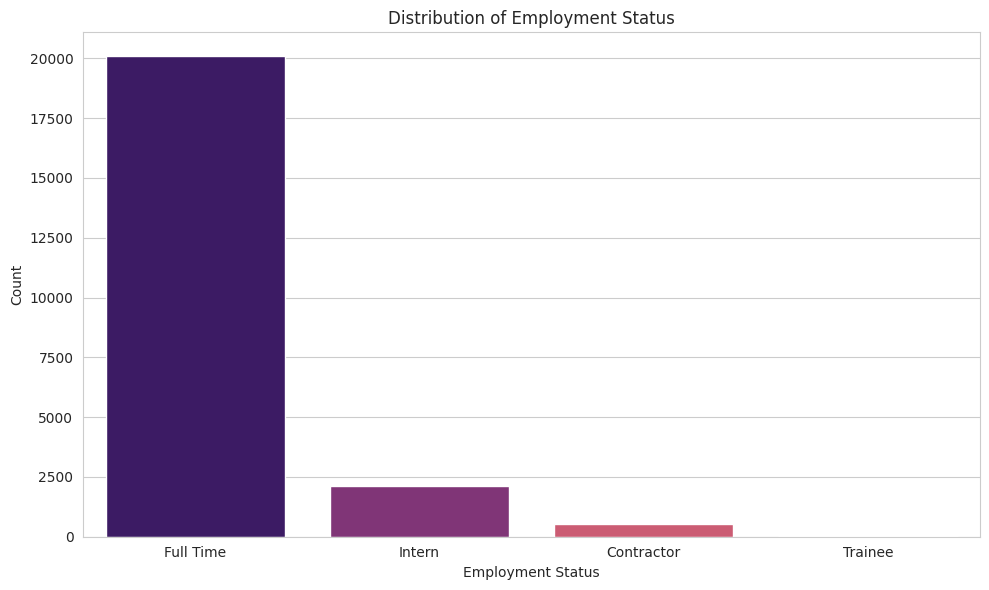


Relationship between Top 10 Job Titles and Employment Status:
Employment Status                             Full Time  Intern
Job Title                                                      
Android Developer                                  2029       0
Backend Developer                                   534       0
Front End Developer                                1412       0
Python Developer                                    485       0
Software Development Engineer                      2351       0
Software Development Engineer (SDE)                1614       0
Software Development Engineer - Intern                0     771
Software Development Engineer In Test (SDET)        766       0
Test Engineer                                      1314       0
Web Developer                                       853       0


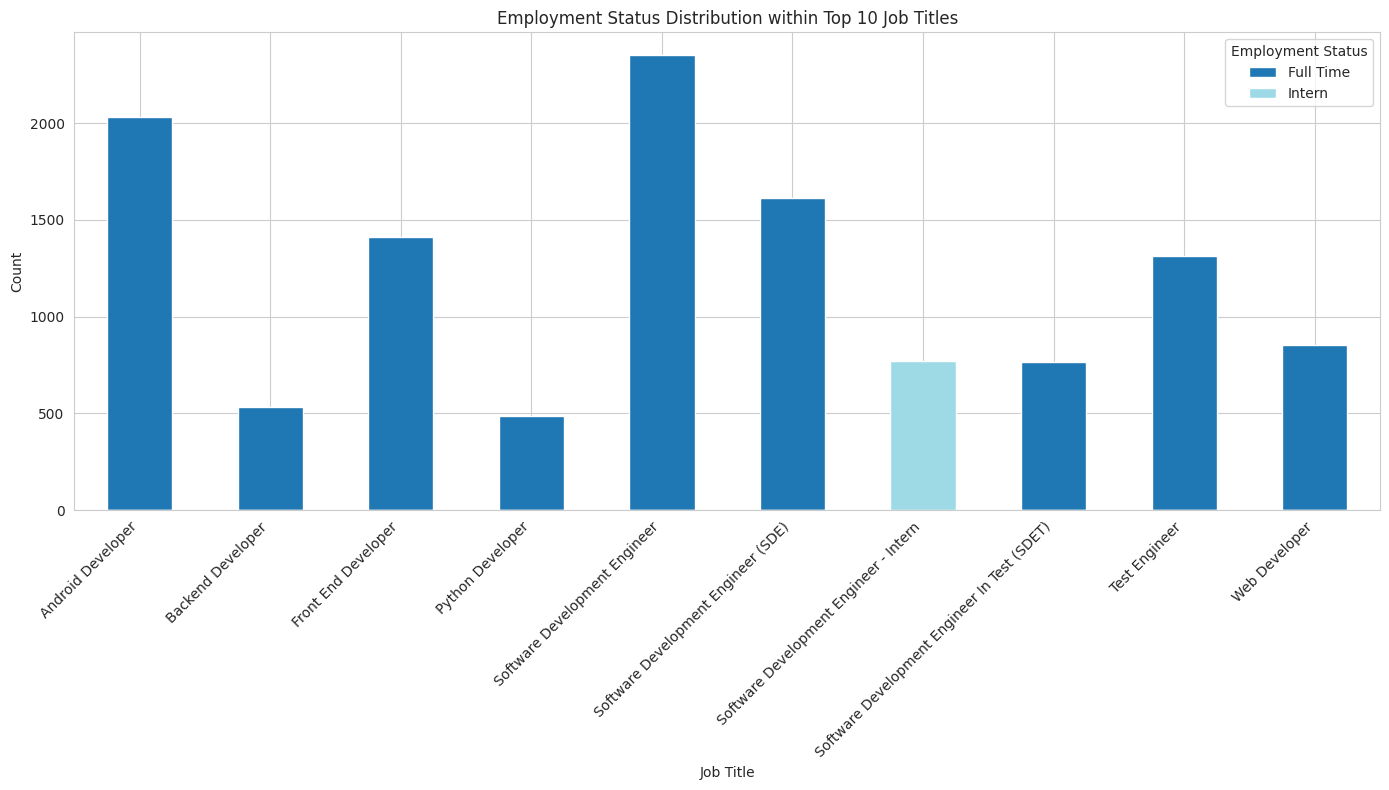

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the plotting style is nice
sns.set_style("whitegrid")

print("--- Classification and Visualizations ---")

# 1. Classification by Job Title
print("\nTop 15 Job Titles and their counts:")
job_title_counts = df['Job Title'].value_counts()
print(job_title_counts.head(15))

plt.figure(figsize=(12, 7))
sns.barplot(y=job_title_counts.head(15).index, x=job_title_counts.head(15).values, palette='viridis')
plt.title('Top 15 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

# 2. Classification by Employment Status
print("\nEmployment Status counts:")
employment_status_counts = df['Employment Status'].value_counts()
print(employment_status_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=employment_status_counts.index, y=employment_status_counts.values, palette='magma')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Relationship between Job Title and Employment Status
print("\nRelationship between Top 10 Job Titles and Employment Status:")
# Get top 10 job titles
top_10_job_titles = df['Job Title'].value_counts().head(10).index

# Filter DataFrame to include only these top 10 job titles
df_top_jobs = df[df['Job Title'].isin(top_10_job_titles)]

# Create a cross-tabulation
cross_tab = pd.crosstab(df_top_jobs['Job Title'], df_top_jobs['Employment Status'])
print(cross_tab)

# Plotting the relationship (stacked bar chart)
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Employment Status Distribution within Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
print("\n--- Top 5 Companies by Average Rating ---\n")

# Group by 'Company Name' and calculate the mean of 'Rating'
company_ratings = df.groupby('Company Name')['Rating'].mean()

# Sort in descending order and get the top 5
top_5_companies = company_ratings.nlargest(5)

print(top_5_companies)


--- Top 5 Companies by Average Rating ---

Company Name
360degreeinfo              5.0
4CRisk.ai                  5.0
4lio                       5.0
4spl Technologies India    5.0
99AppDev                   5.0
Name: Rating, dtype: float64



--- Analysis of Jobs by Location ---

The location with the most reported jobs is 'Bangalore' with 8264 jobs.

--- Line Chart: Top 20 Locations by Number of Jobs ---


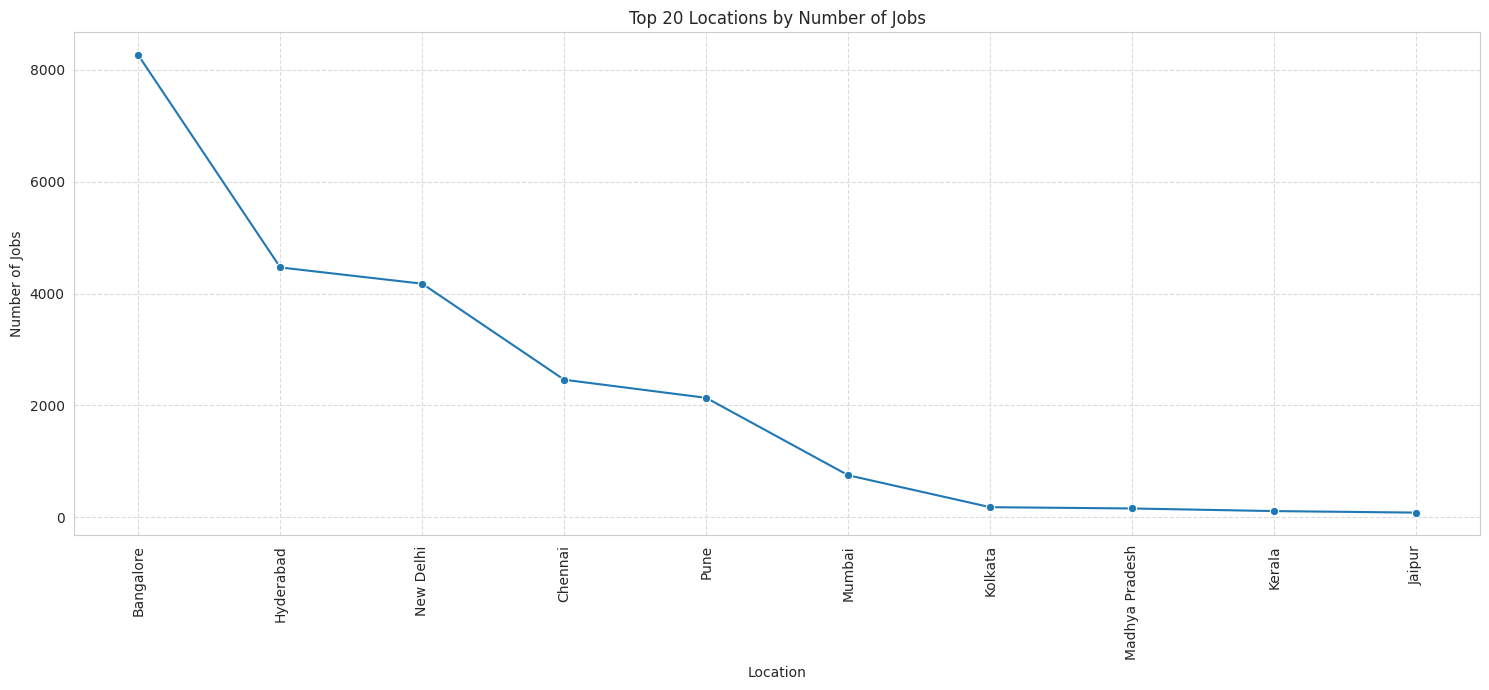

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

print("\n--- Analysis of Jobs by Location ---\n")

# Calculate job counts per location
location_job_counts = df['Location'].value_counts()

# Identify the location with the most jobs
most_jobs_location = location_job_counts.idxmax()
max_jobs_count = location_job_counts.max()

print(f"The location with the most reported jobs is '{most_jobs_location}' with {max_jobs_count} jobs.\n")

# Generate a line chart for job counts per location (Top 20 for readability)
print("--- Line Chart: Top 20 Locations by Number of Jobs ---")

top_locations_for_plot = location_job_counts.head(20)

plt.figure(figsize=(15, 7))
sns.lineplot(x=top_locations_for_plot.index, y=top_locations_for_plot.values, marker='o')
plt.title('Top 20 Locations by Number of Jobs')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



--- Correlation between Salary and Rating ---

Average Salary by Rating:
    Rating        Salary
0     1.00  4.755778e+05
1     1.30  1.500000e+06
2     1.40  3.312000e+05
3     1.50  2.410000e+05
4     1.60  6.795000e+05
5     1.70  7.500000e+05
6     1.80  3.303333e+05
7     1.90  8.576000e+05
8     2.00  4.374815e+05
9     2.10  4.658667e+05
10    2.20  5.078140e+05
11    2.30  4.299535e+05
12    2.40  6.123019e+05
13    2.50  5.611753e+05
14    2.60  5.146768e+05
15    2.70  5.451837e+05
16    2.80  5.782946e+05
17    2.90  5.701825e+05
18    3.00  5.084146e+05
19    3.10  6.558359e+05
20    3.20  5.986521e+05
21    3.30  6.867452e+05
22    3.40  6.692261e+05
23    3.50  6.652105e+05
24    3.60  7.846719e+05
25    3.70  6.783244e+05
26    3.80  7.162006e+05
27    3.85  5.989091e+05
28    3.90  7.198834e+05
29    3.95  4.538098e+05
30    4.00  6.699946e+05
31    4.10  7.364948e+05
32    4.20  7.413859e+05
33    4.30  7.437572e+05
34    4.40  8.394341e+05
35    4.50  6.678399e+05
3

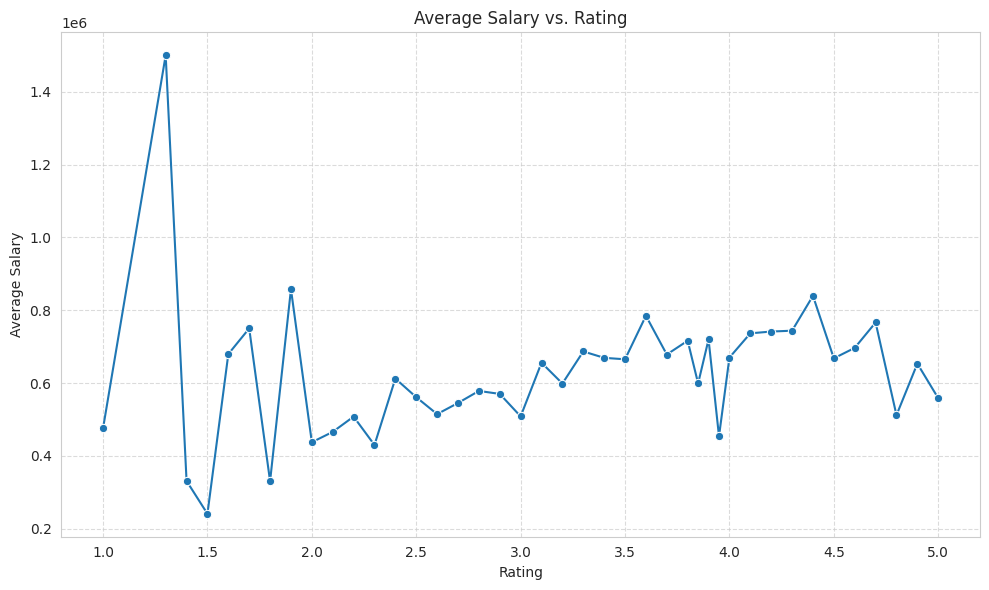

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

print("\n--- Correlation between Salary and Rating ---\n")

# Calculate the average salary for each rating
average_salary_by_rating = df.groupby('Rating')['Salary'].mean().reset_index()

print("Average Salary by Rating:")
print(average_salary_by_rating)

# Create a line chart to visualize the correlation
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rating', y='Salary', data=average_salary_by_rating, marker='o')
plt.title('Average Salary vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# Calculate basic descriptive statistics for numerical columns
basic_metrics_df = df.describe()

# Calculate salary percentiles
salary_percentiles = df['Salary'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Calculate average salary by employment status
salary_by_employment = df.groupby('Employment Status')['Salary'].mean().sort_values(ascending=False)

# Calculate top 10 paying job titles
top_paying_job_titles = df.groupby('Job Title')['Salary'].mean().nlargest(10)


print("\n--- Basic Metrics (df.describe()) ---\n")
print(basic_metrics_df)

print("\n--- Salary Percentiles ---\n")
print(salary_percentiles)

print("\n--- Correlation Matrix (Numerical Columns) ---\n")
print(correlation_matrix)

print("\n--- Average Salary by Employment Status ---\n")
print(salary_by_employment)

print("\n--- Top 10 Paying Job Titles (Average Salary) ---\n")
print(top_paying_job_titles)


--- Basic Metrics (df.describe()) ---

             Rating        Salary  Salaries Reported
count  22770.000000  2.277000e+04       22770.000000
mean       3.918213  6.953872e+05           1.855775
std        0.519675  8.843990e+05           6.823668
min        1.000000  2.112000e+03           1.000000
25%        3.700000  3.000000e+05           1.000000
50%        3.900000  5.000000e+05           1.000000
75%        4.200000  9.000000e+05           1.000000
max        5.000000  9.000000e+07         361.000000

--- Salary Percentiles ---

0.25     300000.0
0.50     500000.0
0.75     900000.0
0.90    1400000.0
0.95    1900000.0
0.99    3100000.0
Name: Salary, dtype: float64

--- Correlation Matrix (Numerical Columns) ---

                     Rating    Salary  Salaries Reported
Rating             1.000000  0.025476          -0.011690
Salary             0.025476  1.000000           0.004481
Salaries Reported -0.011690  0.004481           1.000000

--- Average Salary by Employment Status